In [1]:
import os
import pandas as pd
import numpy as np
import random
import scipy
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

In [2]:
np.log10(1.3)

0.11394335230683679

In [3]:
def laplace_noise(epsilon):

    theta = np.random.uniform(0, 2*np.pi)
    p = random.random()
    r = -1 / epsilon * (scipy.special.lambertw((p - 1) / np.e, k=-1, tol=1e-8).real + 1)
    x, y = r * np.cos(theta), r * np.sin(theta)

    return r


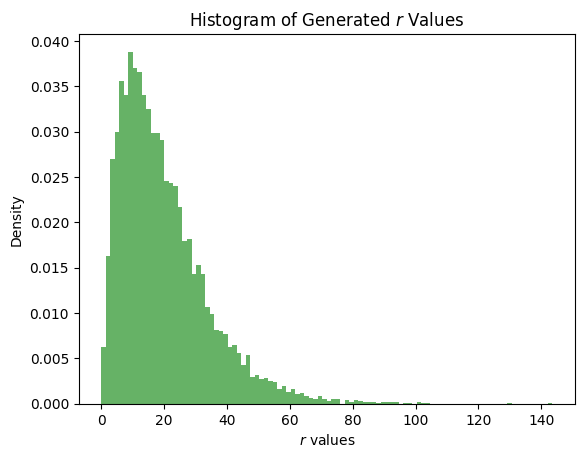

In [4]:
def generate_rs(epsilon, num_samples):
    return [laplace_noise(epsilon) for _ in range(num_samples)]

# Parameters
epsilon = 0.1  # Privacy parameter
num_samples = 10000    # Number of r values to generate

# Generate r values
rl = generate_rs(epsilon, num_samples)

plt.hist(rl, bins=100, density=True, alpha=0.6, color='g')
plt.title('Histogram of Generated $r$ Values')
plt.xlabel('$r$ values')
plt.ylabel('Density')
plt.show()
#np.mean(rl)

In [5]:
np.max(rl)

143.47744736044197

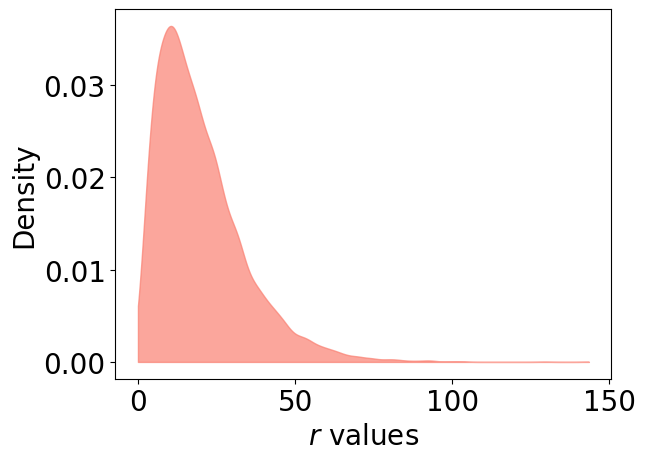

In [12]:
rl_array = np.array(rl).reshape(-1, 1)  # Reshape to 2D array for sklearn

# Fit Kernel Density Estimation
kde = KernelDensity(kernel='gaussian', bandwidth=2)
kde.fit(rl_array)

# If you want to evaluate the density at specific points:
x_l = np.linspace(0, max(rl), 1000).reshape(-1, 1)
log_density = kde.score_samples(x_l)
pdf = np.exp(log_density)  # Convert log density to probability density


plt.fill_between(x_l.flatten(), pdf, color='salmon', alpha=0.7)
plt.tick_params(axis='both', which='major', labelsize=20)
# Adjusting the x-axis and y-axis tick intervals and formatting
plt.xticks(np.arange(0, 155, 50))  # Set x ticks from 0 to 12 with a step of 1
plt.xlabel('$r$ values', size = 20 )
plt.ylabel('Density', size = 20)
plt.show()

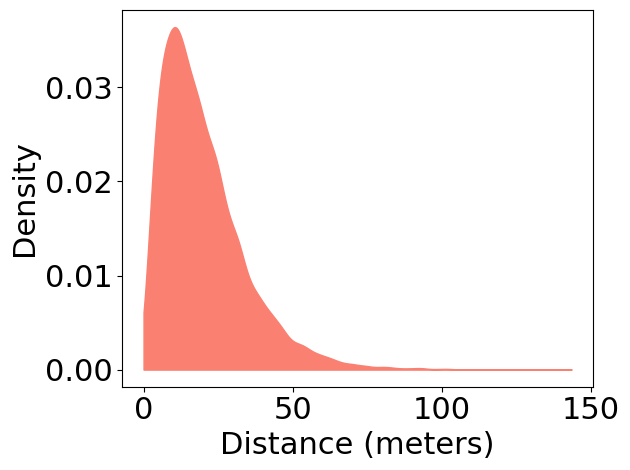

In [14]:
plt.fill_between(x_l.flatten(), pdf, color='salmon', alpha=1)
plt.tick_params(axis='both', which='major', labelsize=22)
# Adjusting the x-axis and y-axis tick intervals and formatting
plt.xticks(np.arange(0, 100, 50))  # Set x ticks from 0 to 12 with a step of 1
plt.xlabel('Distance (meters)', size = 22 )
plt.ylabel('Density', size = 22)
plt.xticks(np.arange(0, 155, 50))  # Set x ticks from 0 to 12 with a step of 1
#custom_y_ticks = [ 0,0,0.01, 0.02, 0.03]  # Replace these values with the ones you think are best for your data
#plt.yticks(custom_y_ticks)  # Set y ticks to your custom values

plt.tight_layout()
plt.savefig(r'C:\Users\ss6365\Desktop\location_privacy-main\location_privacy-main\figure\laplace_plot_1.svg', format='svg', transparent=True)

plt.show()

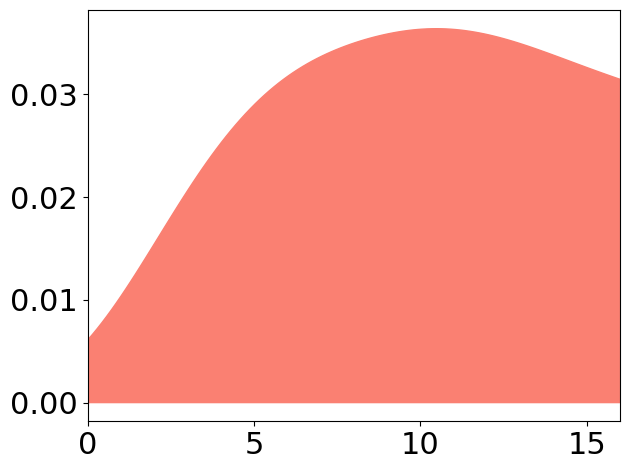

In [15]:
plt.fill_between(x_l.flatten(), pdf, color='salmon', alpha=1)
plt.tick_params(axis='both', which='major', labelsize=22)

#plt.xlabel('Radius (meters)', size = 22 )
#plt.ylabel('Density', size = 22)
plt.xticks(np.arange(0, 21, 5))  # Set x ticks from 0 to 12 with a step of 1
#custom_y_ticks = [ 0, 0.02, 0.04]  # Replace these values with the ones you think are best for your data
#plt.yticks(custom_y_ticks)  # Set y ticks to your custom values

plt.xlim(0, 16)


# Adjust plot to ensure labels and titles are not cut off
plt.tight_layout()

# Save the plot as an SVG file with transparency
plt.savefig(r'C:\Users\ss6365\Desktop\location_privacy-main\location_privacy-main\figure\laplace_plot_2.svg', format='svg', transparent=True)

# Show the plot
plt.show()

In [232]:
np.mean(rl)

20.00877169202943

In [233]:
np.max(rl)

210.43727875371926

In [22]:
def pdf_values(epsilon, x_interval, L):
    set_random_seed()
    b = (1 - np.exp(-epsilon)) / x_interval
    intervals = int(L / x_interval)
    positions = np.linspace(0, L - x_interval, intervals)
    unnormalized_pdf_samples = b * np.exp(-epsilon * positions)
    
    area = np.sum(unnormalized_pdf_samples) * x_interval
    normalized_pdf_samples = unnormalized_pdf_samples / area
    return positions, normalized_pdf_samples

def draw_from_pdf(epsilon, x_interval, L):
    positions, normalized_pdf_samples = pdf_values(epsilon, x_interval, L)
    
    cdf = np.cumsum(normalized_pdf_samples)
    cdf /= cdf[-1]
    
    r = np.random.rand()
    
    index = np.searchsorted(cdf, r)
    
    start_of_interval = positions[index]
    end_of_interval = start_of_interval + x_interval
    random_r_value = np.random.uniform(start_of_interval, end_of_interval)
    
    theta = np.random.uniform(0, 2 * np.pi)
    
    x = random_r_value * np.cos(theta)
    y = random_r_value * np.sin(theta)
    
    return random_r_value
    
def set_random_seed():
    """Set the random seed for both numpy and random modules to a fixed value."""
    np.random.seed()
    random.seed()
    
def generate_laplace_noise_samples(number_samples, epsilon):
    set_random_seed()
    samples = []
    for _ in range(number_samples):
        theta = np.random.uniform(0, 2 * np.pi)
        p = random.random()
        r = -1 / epsilon * (scipy.special.lambertw((p - 1) / np.e, k=-1, tol=1e-8).real + 1)
        x, y = r * np.cos(theta), r * np.sin(theta)
        samples.append(r)
    return samples

def generate_staircase_noise_samples(epsilon, x_interval, L, number_samples):
    samples = []
    for _ in range(number_samples):
        r = draw_from_pdf(epsilon, x_interval, L)
        samples.append((r))
    return samples

In [56]:
l=generate_laplace_noise_samples(10000, 1)

np.mean(l)

1.9767485772152482

In [52]:
s = generate_staircase_noise_samples(1,0.1, 10000, 10000)

In [53]:
np.mean(s)

0.9873835034423494

In [59]:
max(s)

9.552993022521695

In [60]:
max(l)

12.011450470905237

In [ ]:
rs_array = np.array(rs).reshape(-1, 1)  # Reshape to 2D array for sklearn

# Fit Kernel Density Estimation
kde = KernelDensity(kernel='gaussian', bandwidth=0.1)
kde.fit(rs_array)

# If you want to evaluate the density at specific points:
x_d = np.linspace(0, max(rs), 1000).reshape(-1, 1)
log_density = kde.score_samples(x_d)
pdf = np.exp(log_density)  # Convert log density to probability density



plt.fill_between(x_d.flatten(), pdf, alpha=0.6)
plt.title('Probability Density Function (PDF) - KDE')
plt.xlabel('$r$ values')
plt.ylabel('Density')
plt.grid(True)
plt.show()